In [ ]:
!pip install hilbertcurve

import ast
import cv2
# import hilbertcurve
import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf

from hilbertcurve.hilbertcurve import HilbertCurve
from itertools import cycle
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from PIL import Image
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))


In [ ]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

seed_value = 69420

os.chdir('/content/drive/My Drive/University/')
# p=5; n=2
# hilbert_curve = HilbertCurve(p, n)

# points = df1["0 points"][0]
# distances = hilbert_curve.distances_from_points(points)


Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("df1.csv", converters={"0 points": from_np_array, "1 points": from_np_array})
del df1["Unnamed: 0"]
df1

,relax,spring_constant,random_strength,seed,iterations,runningtime,Distance metric,Fractional length,0 points,1 points
0,False,25,5.0,33,1000,163.205387,298241.253822,426.068417,"[[15.71204777, 17.38893348], [24.62492824, 7.9...","[[9.89553994, 20.43720283], [26.26450585, 17.3..."
1,False,25,5.0,33,101,163.205387,320897.808813,1301.188661,"[[14.91211699, 18.95885336], [23.3798347, 7.57...","[[8.83074324, 21.14901585], [26.85668938, 19.1..."
2,False,25,5.0,33,11,163.205387,325886.094601,1800.060986,"[[16.69026971, 18.89370019], [24.21586023, 8.2...","[[8.70371315, 20.91055469], [26.83123708, 18.6..."
3,False,25,5.0,28,1000,164.813399,305019.344769,680.830631,"[[9.50377934, 1.87361477], [18.88565106, 9.372...","[[19.08925187, 5.61870748], [16.48866036, 21.2..."
4,False,25,5.0,28,101,164.813399,322194.138760,1379.367188,"[[5.64377292, 2.70034468], [17.3100798, 6.1595...","[[21.22121751, 6.00216625], [14.19803867, 18.2..."
...,...,...,...,...,...,...,...,...,...,...
115,False,50,10.0,37,101,126.397569,339896.153881,1307.738568,"[[24.074513, 10.3540366], [27.1251682, 20.9710...","[[18.1368615, 8.61319775], [0.12604191, 6.6577..."
116,False,50,10.0,37,11,126.397569,333801.596529,2224.108505,"[[23.1928409, 3.88214413], [18.3177222, 26.252...","[[21.95025684, 14.22173584], [6.64621405, 11.9..."
117,False,50,10.0,16,1000,127.213215,337842.256024,2326.030585,"[[16.9416396, 29.5229699], [14.5986631, 6.7673...","[[30.0, 14.19077627], [20.82988331, 14.0940992..."
118,False,50,10.0,16,101,127.213215,342282.548075,1726.559806,"[[13.0859881, 18.5209177], [17.0968561, 10.157...","[[14.5319601, 4.00121529], [19.17333079, 5.583..."


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


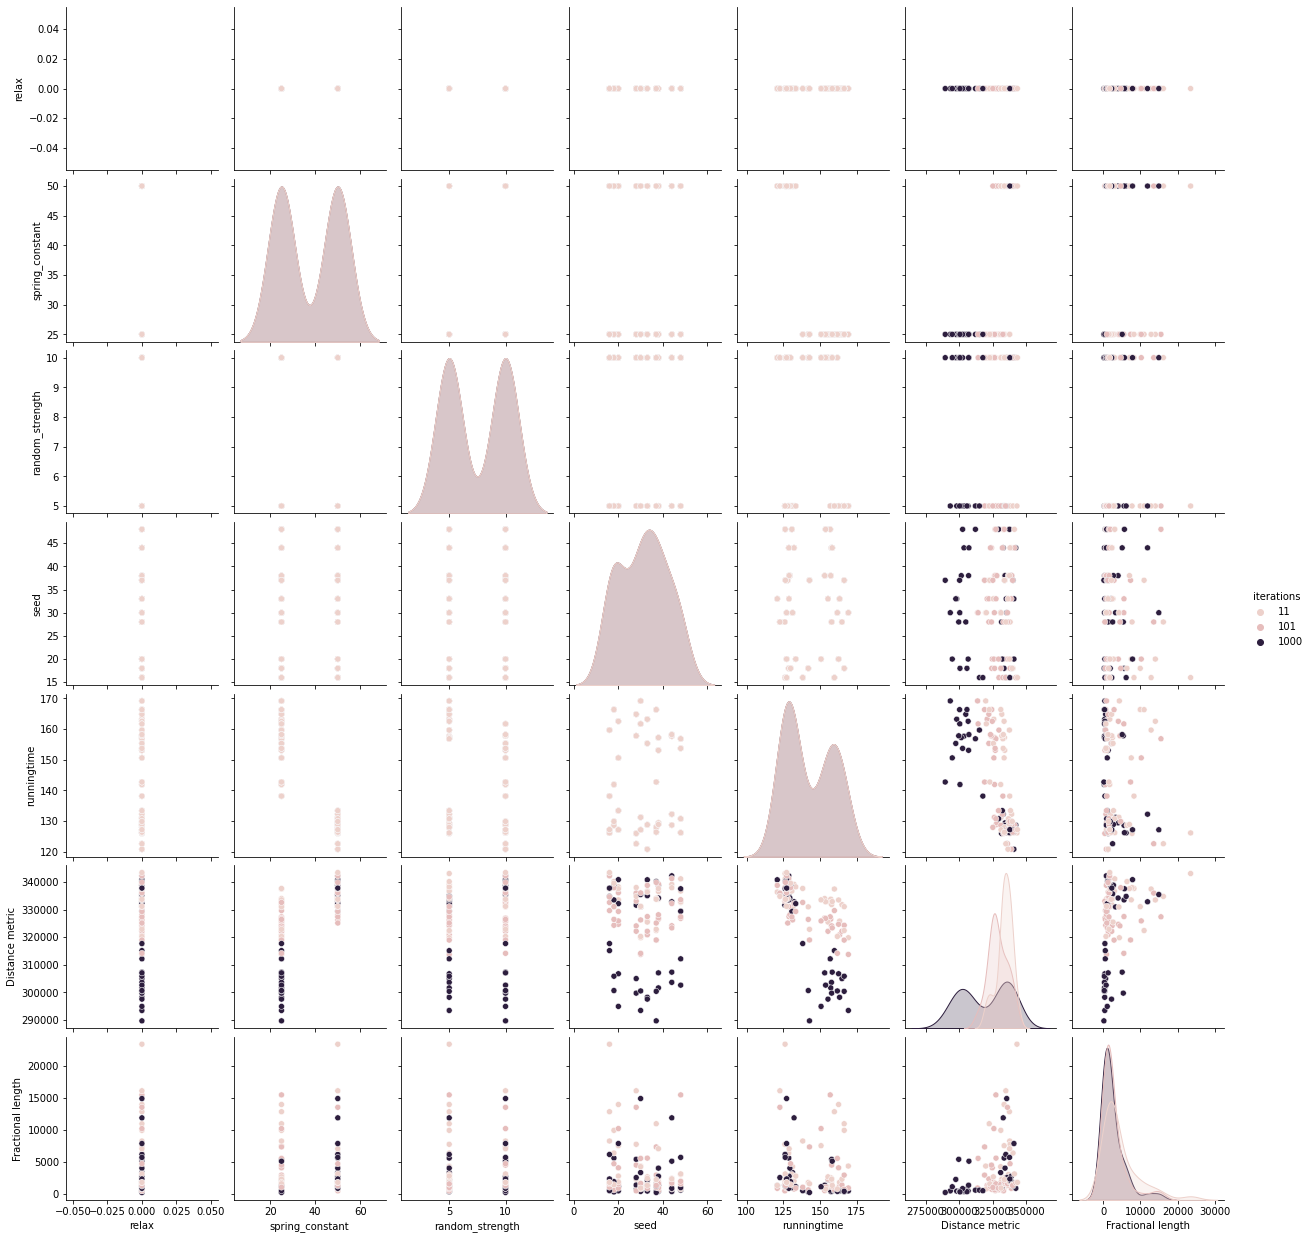

In [ ]:
sns.pairplot(df1, hue = 'iterations');

In [ ]:
df1 = df1.loc[df1['iterations'] != 11]

del df1["0 points"]
del df1["1 points"]
del df1["runningtime"]
del df1["seed"]
del df1["relax"]

normalized_df = (df1 - df1.min()) / (df1.max() - df1.min())

# x_columns = [c for c in normalized_df.columns if c != 'iterations']
x_columns = [c for c in normalized_df.columns if c != 'random_strength']
# y_column = 'iterations'
y_column = 'random_strength'

X = normalized_df[x_columns]
# y = normalized_df['iterations']
y = normalized_df['random_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print('Train values:\n', y_train.value_counts())
print('Test values:\n', y_test.value_counts())

Train values:
 0.0    33
1.0    31
Name: random_strength, dtype: int64
Test values:
 1.0    9
0.0    7
Name: random_strength, dtype: int64


In [ ]:
normalized_df

,spring_constant,random_strength,iterations,Distance metric,Fractional length
0,0.0,0.0,1.0,0.162662,0.014367
1,0.0,0.0,0.0,0.593291,0.071632
3,0.0,0.0,1.0,0.291492,0.031038
4,0.0,0.0,0.0,0.617930,0.076748
6,0.0,0.0,1.0,0.071613,0.015829
...,...,...,...,...,...
112,1.0,1.0,0.0,0.918047,0.294513
114,1.0,1.0,1.0,0.960689,0.066579
115,1.0,1.0,0.0,0.954390,0.072060
117,1.0,1.0,1.0,0.915352,0.138694


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate


In [ ]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring = scoring, cv = 2)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [ ]:
dtree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(dtree, X_train, y_train, scoring = scoring, cv = 2)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [ ]:
SVM = SVC()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring = scoring, cv = 2)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [ ]:
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring = scoring, cv = 2)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring = scoring, cv = 2)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [ ]:
forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(forest, X_train, y_train, scoring = scoring, cv = 2)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [ ]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring = scoring, cv = 2)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [ ]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring = scoring, cv = 2)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 
                     'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, 
                     bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by = 'Accuracy', ascending = False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.135663,0.028442,0.656250,0.656434,0.656679,0.656189,0.673143
1,Decision Tree,0.002193,0.008621,0.593750,0.593934,0.593934,0.593750,0.593934
4,Quadratic Discriminant Analysis,0.001568,0.005486,0.515625,0.515625,0.515686,0.511886,0.506840
6,K-Nearest Neighbors,0.001782,0.007921,0.468750,0.469481,0.473407,0.457837,0.483180
7,Bayes,0.001765,0.005580,0.406250,0.405584,0.409988,0.399230,0.483341
2,Support Vector Machine,0.001987,0.005935,0.390625,0.387500,0.394363,0.381277,0.448085
0,Logistic Regression,0.005500,0.005660,0.359375,0.355952,0.361029,0.353452,0.322963
3,Linear Discriminant Analysis,0.002334,0.005629,0.359375,0.346893,0.354228,0.351463,0.348353


In [ ]:
df11 = df1.loc[df1['iterations'] == 11]
df101 = df1.loc[df1['iterations'] == 101]
df1000 = df1.loc[df1['iterations'] == 1000]
df11

,relax,spring_constant,random_strength,seed,iterations,runningtime,Distance metric,Fractional length,0 points,1 points
2,False,25,5.0,33,11,163.205387,325886.094601,1800.060986,"[[16.69026971, 18.89370019], [24.21586023, 8.2...","[[8.70371315, 20.91055469], [26.83123708, 18.6..."
5,False,25,5.0,28,11,164.813399,331857.608903,2287.233174,"[[4.68490853, 3.30633179], [17.7449977, 5.6135...","[[21.6028168, 6.2303117], [13.93593138, 18.073..."
8,False,25,5.0,30,11,169.161942,319838.108669,4345.507603,"[[15.93311716, 8.27366463], [0.46008415, 18.68...","[[18.92130511, 19.75845875], [4.41663296, 17.6..."
11,False,25,5.0,44,11,157.675653,332865.746449,1859.018622,"[[12.5168736, 16.1023291], [25.5662973, 4.7169...","[[6.60017014, 10.03289613], [0.85238322, 8.867..."
14,False,25,5.0,38,11,157.206038,333819.715004,2498.458186,"[[17.97741501, 10.7553879], [20.11210546, 2.53...","[[17.35296857, 18.91652693], [15.62645923, 8.3..."
17,False,25,5.0,48,11,156.828228,332643.128519,1110.742038,"[[17.56652875, 3.53236139], [22.00561732, 8.97...","[[14.96695158, 23.97739029], [28.02033442, 21...."
20,False,25,5.0,20,11,162.527799,333533.782073,13986.173202,"[[27.5547844, 19.8775623], [22.6265503, 27.046...","[[23.0900931, 23.0052553], [19.0040654, 15.118..."
23,False,25,5.0,18,11,166.352229,331109.078027,9937.037235,"[[4.7872117, 19.46989568], [10.86469917, 6.695...","[[14.72897174, 18.60951568], [9.09397089, 29.9..."
26,False,25,5.0,37,11,166.315133,322451.972997,10972.338771,"[[21.51877906, 3.24387529], [19.22263353, 25.5...","[[23.59705869, 19.46540055], [6.47412498, 15.1..."
29,False,25,5.0,16,11,159.665162,337514.301715,12851.843219,"[[12.47104903, 15.35102458], [13.83372293, 14....","[[11.3738383, 4.37569904], [11.5961985, 6.1519..."


In [ ]:
df11.reset_index(drop=True, inplace=True)

for index, row in df11.iterrows():
    points0 = row["0 points"]
    points1 = row["1 points"]
    # print(index)
    # print(points0)

    width = height = 31
    size = width, height

    img = Image.new("RGB", size)

    data = img.load()
    for pt0 in points0:
        data[pt0[0], pt0[1]] = (0, 128, 0)
    for pt1 in points1:
        data[pt1[0], pt1[1]] = (255, 0, 255)

    if index < 0.8 * 40:
        os.chdir('/content/drive/My Drive/University/train/eleven/')
        name = (str(index + 1).zfill(2) + '.png')
        # print(name)

        img.show()
        img.save(name)

    else:
        os.chdir('/content/drive/My Drive/University/valid/eleven/')
        name = (str(int(index + 1 - 0.8 * 40)).zfill(2) + '.png')
        # print(name)

        img.show()
        img.save(name)

    # break


In [ ]:
df101.reset_index(drop=True, inplace=True)

for index, row in df101.iterrows():
    points0 = row["0 points"]
    points1 = row["1 points"]
    # print(index)
    # print(points0)

    width = height = 31
    size = width, height

    img = Image.new("RGB", size)

    data = img.load()
    for pt0 in points0:
        data[pt0[0], pt0[1]] = (0, 128, 0)
    for pt1 in points1:
        data[pt1[0], pt1[1]] = (255, 0, 255)

    if index < 0.8 * 40:
        os.chdir('/content/drive/My Drive/University/train/one-oh-one/')
        name = (str(index + 1).zfill(2) + '.png')
        # print(name)

        img.show()
        img.save(name)

    else:
        os.chdir('/content/drive/My Drive/University/valid/one-oh-one/')
        name = (str(int(index + 1 - 0.8 * 40)).zfill(2) + '.png')
        # print(name)

        img.show()
        img.save(name)

    # break


In [ ]:
df1000.reset_index(drop=True, inplace=True)

for index, row in df1000.iterrows():
    points0 = row["0 points"]
    points1 = row["1 points"]
    # print(index)
    # print(points0)

    width = height = 31
    size = width, height

    img = Image.new("RGB", size)

    data = img.load()
    for pt0 in points0:
        data[pt0[0], pt0[1]] = (0, 128, 0)
    for pt1 in points1:
        data[pt1[0], pt1[1]] = (255, 0, 255)

    if index < 0.8 * 40:
        os.chdir('/content/drive/My Drive/University/train/thousand/')
        name = (str(index + 1).zfill(2) + '.png')
        # print(name)

        img.show()
        img.save(name)

    else:
        os.chdir('/content/drive/My Drive/University/valid/thousand/')
        name = (str(int(index + 1 - 0.8 * 40)).zfill(2) + '.png')
        # print(name)

        img.show()
        img.save(name)

    # break


In [ ]:
# get_ipython().__class__.__name__ = "ZMQInteractiveShell"


In [ ]:
# points0 = df1["0 points"][0]
# points1 = df1["1 points"][0]
# max_x = max_y = 0

# for pt0 in points0:
#     max_x = max([max_x, pt0[0]])
#     max_y = max([max_y, pt0[1]])

# for pt1 in points1:
#     max_x = max([max_x, pt1[0]])
#     max_y = max([max_y, pt1[1]])

# width = int(max_x + 1)
# height = int(max_y + 1)

# size = width, height

# img = Image.new("RGB", size)

# data = img.load()
# for pt0 in points0:
#     data[pt0[0], pt0[1]] = (0, 128, 0)
# for pt1 in points1:
#     data[pt1[0], pt1[1]] = (255, 0, 255)

# img.show()
# img.save("points.jpg")


In [ ]:
# size

In [ ]:
# os.chdir('/content/drive/My Drive/University/')

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

os.chdir('/content/drive/My Drive/University/')
train_generator = train_datagen.flow_from_directory(
        directory='train',
        classes = ['eleven', 'thousand'],
        target_size=(112, 112),
        batch_size=8,
        class_mode='binary')

os.chdir('/content/drive/My Drive/University/')
validation_generator = validation_datagen.flow_from_directory(
        directory='valid',
        classes = ['eleven', 'thousand'],
        target_size=(112, 112),
        batch_size=2,
        class_mode='binary',
        shuffle=False)


Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# from keras import backend as K
# K.set_image_dim_ordering('th')


In [ ]:
# def Model():
#     model = Sequential()

#     model.add(Conv2D(16, (5, 5), activation='relu', input_shape=IMAGE_SHAPE))
#     model.add(BatchNormalization())
#     model.add(AveragePooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.35))

#     model.add(Conv2D(32, (4, 4), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(AveragePooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.35))

#     model.add(Conv2D(64, (4, 4), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(AveragePooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.35))

#     model.add(Conv2D(96, (4, 4), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(AveragePooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.35))

#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(AveragePooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.35))

#     model.add(Dense(2240, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.4))

#     model.add(Dense(280, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.4))

#     model.add(Flatten())
#     model.add(Dropout(0.4))
#     model.add(Dense(1, activation='sigmoid'))
#     model.add(BatchNormalization())

#     return model

def Model():
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model


In [ ]:
IMAGE_WIDTH = 112
IMAGE_HEIGHT = 112
IMAGE_CHANNELS = 3

IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

Model().summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)       

In [ ]:
def imshow(img):
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    elif img.shape[2] == 1:
        plt.imshow(img[:,:,0], cmap='gray')
    else:
        plt.imshow(img)
    plt.show()


In [ ]:
learning_rate = 0.1
loss_function = "binary_crossentropy"

model = Model()
optimizer = tf.keras.optimizers.Adam(learning_rate) 
model.compile(optimizer, loss_function, metrics=["mae", "mse"])


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=5, restore_best_weights=True, verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [ ]:
training_step = train_generator.n // 8
validation_step = validation_generator.n // 2

history = model.fit(train_generator,
      steps_per_epoch=training_step,  
      epochs=151,
      verbose=1,
      validation_data=validation_generator,
      validation_steps=validation_step,
      callbacks=[earlystop, learning_rate_reduction])


Epoch 1/151
8/8 [==============================] - 2s 150ms/step - loss: 3443.8193 - mae: 0.5021 - mse: 0.3770 - val_loss: 111.1391 - val_mae: 0.5000 - val_mse: 0.5000
Epoch 2/151
8/8 [==============================] - 1s 116ms/step - loss: 44.7569 - mae: 0.5391 - mse: 0.4784 - val_loss: 1.0341 - val_mae: 0.5000 - val_mse: 0.3736
Epoch 3/151
8/8 [==============================] - 1s 117ms/step - loss: 1.0950 - mae: 0.5348 - mse: 0.3836 - val_loss: 0.9255 - val_mae: 0.5000 - val_mse: 0.3429
Epoch 4/151
8/8 [==============================] - 1s 118ms/step - loss: 0.9088 - mae: 0.5355 - mse: 0.3389 - val_loss: 0.9219 - val_mae: 0.5000 - val_mse: 0.3418
Epoch 5/151
8/8 [==============================] - 1s 116ms/step - loss: 0.9803 - mae: 0.5381 - mse: 0.3649 - val_loss: 1.1273 - val_mae: 0.5000 - val_mse: 0.3951
Epoch 6/151
8/8 [==============================] - 1s 117ms/step - loss: 1.0453 - mae: 0.5103 - mse: 0.3655 - val_loss: 0.7797 - val_mae: 0.5000 - val_mse: 0.2898
Epoch 7/151
8/8 

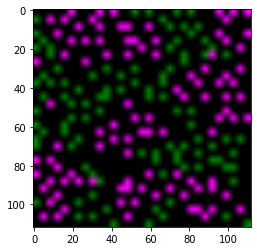

(1, 112, 112, 3)
[[0.]]


In [ ]:
os.chdir('/content/drive/My Drive/University/valid/thousand/')

image = cv2.imread('02.png')
image = cv2.resize(image, dsize=(112, 112))
imshow(image)

image = image.reshape(1, 112, 112, 3)
print(image.shape)

print(model.predict(image))


In [ ]:
# os.chdir('/content/drive/My Drive/University/valid/one-oh-one/')

# image = cv2.imread('02.png')

# imshow(image)
# print(model.predict(image))


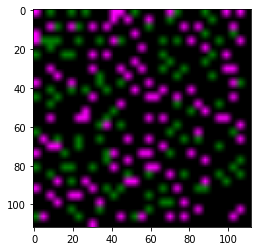

(1, 112, 112, 3)
[[0.]]


In [ ]:
os.chdir('/content/drive/My Drive/University/valid/eleven/')

image = cv2.imread('02.png')
image = cv2.resize(image, dsize=(112, 112))
imshow(image)

image = image.reshape(1, 112, 112, 3)
print(image.shape)

print(model.predict(image))


In [ ]:
df1["0 points"][0]
# df1["0 points"][0].shape

array([[15.71204777, 17.38893348],
       [24.62492824,  7.94961048],
       [20.15459308, 22.70480139],
       [26.68115701,  5.18963659],
       [21.02012697, 17.58159865],
       [14.6128373 , 28.50974367],
       [14.38251095, 16.39507362],
       [29.88173071, 16.98725623],
       [ 8.62907321,  8.37221679],
       [13.04957267,  2.22970091],
       [19.59551711, 20.50900355],
       [13.00517571, 29.90617695],
       [27.97286734, 16.42359232],
       [23.21477007,  6.5968777 ],
       [ 0.71025674, 26.1804061 ],
       [ 8.69914714,  5.24363859],
       [22.8340408 , 20.02144886],
       [ 6.65543862,  8.4811013 ],
       [11.30919475, 15.7265272 ],
       [ 1.10609378, 10.36239761],
       [14.41758862, 14.36590053],
       [ 6.23562142,  3.75647428],
       [ 2.61612187, 22.44195094],
       [20.85807202, 15.96199007],
       [ 7.30828147,  7.11403928],
       [ 5.27998583,  7.13957692],
       [ 3.62180051,  7.76034081],
       [ 8.68545368,  6.70385428],
       [19.23516289,